In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

import sys
sys.path.append('..')
from stonks.DataCatcher import db

In [2]:
def fetch_last(dbase, indent=4000):
    names = dbase.get_columns_names()
    data = dbase.get_data_from_DB(time.time() - indent, time.time(), pair_name='btcusdt')
    data = pd.DataFrame(data=data, columns=names)
    return data

In [3]:
dbase = db()
data = fetch_last(dbase)

Enter server address: 45.12.18.221
Enter login: hinser
Enter password: anime$girls131


In [4]:
import datetime

def plot(data):
    data['target'] = (data['depth_bid_price_1'] + data['depth_ask_price_1']) / 2.
    data['normal_time'] = data['time'].apply(datetime.datetime.fromtimestamp)
    plt.figure(figsize=(15, 5))
    plt.plot(data['normal_time'], data['target'])

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


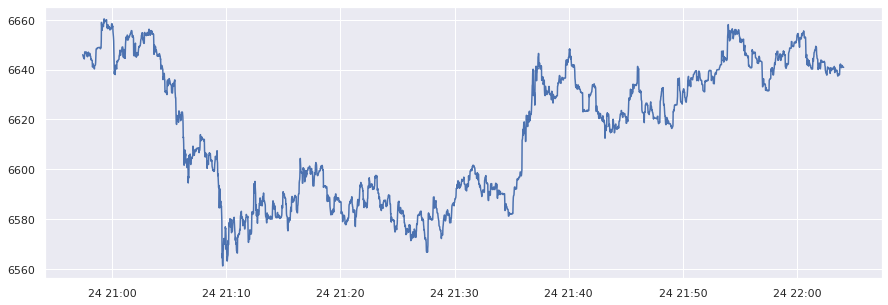

In [5]:
plot(data)

In [13]:
data.head()

,id,time,currency_pair,kline_trade_number,kline_open_price,kline_close_price,kline_high_price,kline_low_price,kline_base_volume,kline_quote_volume,...,depth_ask_quantity_13,depth_ask_quantity_14,depth_ask_quantity_15,depth_ask_quantity_16,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20,target,normal_time
0,15214803,1.585045e+09,btcusdt,693,6764.8,6753.72,6766.82,6750.0,88.204522,595872.443926,...,0.816351,0.274528,0.30191,0.396000,0.257948,0.230490,0.296051,0.107962,6751.500,2020-03-24 13:10:05.781765
1,15214814,1.585045e+09,btcusdt,693,6764.8,6753.72,6766.82,6750.0,88.204522,595872.443926,...,0.816351,0.274528,0.30191,0.396000,0.257948,0.126000,0.230490,0.296051,6751.235,2020-03-24 13:10:06.988898
2,15214825,1.585045e+09,btcusdt,693,6764.8,6753.72,6766.82,6750.0,88.204522,595872.443926,...,0.882000,0.080467,0.30000,0.396000,0.126000,0.008340,0.189119,0.296051,6750.460,2020-03-24 13:10:08.160582
3,15214836,1.585045e+09,btcusdt,693,6764.8,6753.72,6766.82,6750.0,88.204522,595872.443926,...,0.045304,0.882000,0.31000,0.816351,1.878336,0.118074,0.300000,0.396000,6750.360,2020-03-24 13:10:09.328001
4,15214847,1.585045e+09,btcusdt,693,6764.8,6753.72,6766.82,6750.0,88.204522,595872.443926,...,0.222217,0.045304,0.88200,0.310000,0.126000,1.878336,0.118074,0.300000,6750.360,2020-03-24 13:10:10.497584


In [15]:
shifted_update = data['kline_time_since_update'].shift(1)
data['new_kline'] = data['kline_time_since_update'] < shifted_update

In [27]:
kline_id = 0

def get_id(x):
    global kline_id
    if x:
        kline_id += 1
    return x * kline_id

data['kline_id'] = data['new_kline'].apply(get_id)

In [36]:
data['kline_id'].replace({0: np.NaN}, inplace=True)
data['kline_id'].ffill(inplace=True)

In [38]:
data.dropna(inplace=True)

In [39]:
data.drop('new_kline', axis=1, inplace=True)

In [41]:
data.drop('new_kline', axis=1, inplace=True)
data.drop(['time', 'id', 'currency_pair'], axis=1, inplace=True)
klines = data[['kline_id', 'kline_trade_number', 'kline_open_price', 'kline_open_price', 'kline_close_price',
       'kline_high_price', 'kline_low_price', 'kline_base_volume',
       'kline_quote_volume', 'kline_taker_base_volume',
       'kline_taker_quote_volume', 'kline_time_since_update', 'kline_update_time']].groupby('kline_id').mean()

In [44]:
klines = data[['kline_id', 'kline_trade_number', 'kline_open_price', 'kline_open_price', 'kline_close_price',
       'kline_high_price', 'kline_low_price', 'kline_base_volume',
       'kline_quote_volume', 'kline_taker_base_volume',
       'kline_taker_quote_volume', 'kline_time_since_update', 'kline_update_time']].groupby('kline_id').mean()

In [50]:
data[51:54]

,kline_trade_number,kline_open_price,kline_close_price,kline_high_price,kline_low_price,kline_base_volume,kline_quote_volume,kline_taker_base_volume,kline_taker_quote_volume,kline_time_since_update,...,depth_ask_quantity_14,depth_ask_quantity_15,depth_ask_quantity_16,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20,target,normal_time,kline_id
97,972,6753.75,6750.79,6755.27,6738.41,127.547477,8.604171e+05,45.293294,3.055822e+05,59457.123779,...,0.004020,0.025715,0.408,0.588667,0.277228,16.192191,0.002101,6708.330,2020-03-24 13:11:59.458678,1.0
98,3205,6750.79,6705.03,6752.25,6681.00,462.539670,3.105422e+06,171.110766,1.148707e+06,654.595947,...,0.388000,0.283325,1.500,0.392000,0.018808,0.043494,1.250000,6706.155,2020-03-24 13:12:00.655777,2.0
99,3205,6750.79,6705.03,6752.25,6681.00,462.539670,3.105422e+06,171.110766,1.148707e+06,1812.776123,...,0.044734,0.400000,0.200,0.100000,0.388000,0.002101,0.004000,6700.595,2020-03-24 13:12:01.813797,2.0


In [51]:
klines['kline_update_time'] = klines['kline_update_time'].apply(
    lambda x: datetime.datetime.fromtimestamp(x / 1000))

In [112]:
import ta

In [61]:
feat = ta.add_all_ta_features(klines, 'kline_open_price', 
                              'kline_high_price', 'kline_low_price', 'kline_close_price', 'kline_base_volume')

data.drop(['kline_trade_number', 'kline_open_price', 'kline_open_price',
       'kline_close_price', 'kline_high_price', 'kline_low_price',
       'kline_base_volume', 'kline_quote_volume', 'kline_taker_base_volume',
       'kline_taker_quote_volume', 'kline_time_since_update',
       'kline_update_time'], axis=1, inplace=True)

feat.drop('kline_update_time', axis=1, inplace=True)

In [6]:
target = data.set_index('normal_time')['target']
target.head()

normal_time
2020-03-24 20:57:25.809335    6646.015
2020-03-24 20:57:26.981605    6645.715
2020-03-24 20:57:28.107799    6645.265
2020-03-24 20:57:29.273027    6645.005
2020-03-24 20:57:30.401691    6644.955
Name: target, dtype: float64

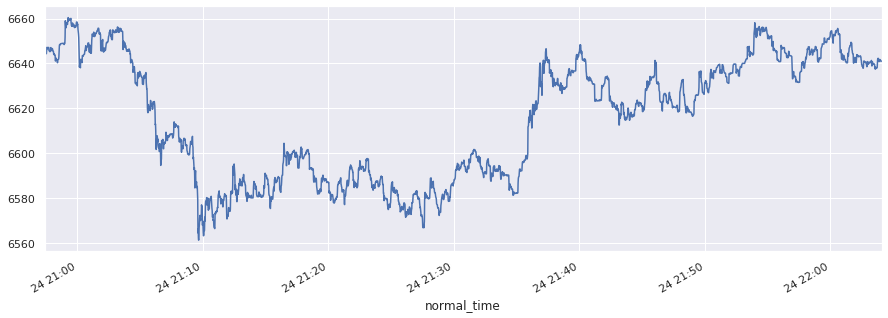

In [7]:
plt.figure(figsize=(15, 5))
target.plot()

In [62]:
mod = 0.01

a = target[:4000].values

diff_mat = a - a[:,None] * (1. + mod)
upper = (np.triu(diff_mat)>0).argmax(1)
np.place(upper, upper == 0, 10 ** 9)

In [63]:
diff_mat = a - a[:,None] * (1. - mod)
lower = (np.triu(diff_mat)<0).argmax(1)
np.place(lower, lower == 0, 10 ** 9)

In [64]:
to_up = (upper - lower) < 0
to_down = (upper - lower)> 0

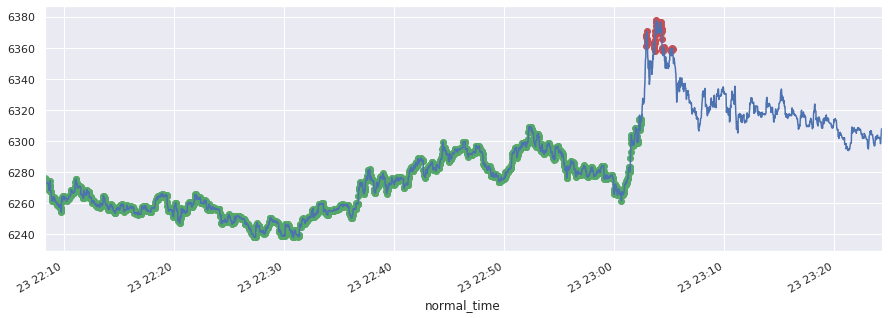

In [65]:
plt.figure(figsize=(15, 5))
target[:4000].plot()
plt.scatter(target[:4000][to_up].index, target[:4000][to_up], color='g')
plt.scatter(target[:4000][to_down].index, target[:4000][to_down], color='r')
plt.savefig('btc3.png')

In [20]:
data2 = fetch_last(dbase, 3600 * 24)

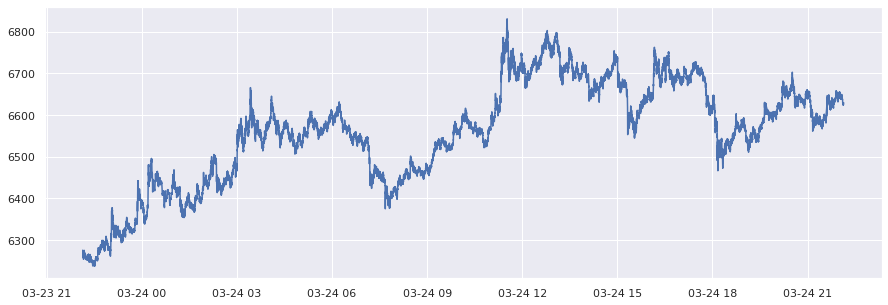

In [21]:
plot(data2)

In [22]:
target = data2.set_index('normal_time')['target']

In [29]:
y = pd.DataFrame(target)
y['normal_time'] = y.index

In [32]:
y

,target,normal_time,id
normal_time,,,
2020-03-23 22:08:16.376047,6275.845,2020-03-23 22:08:16.376047,0
2020-03-23 22:08:17.468746,6275.415,2020-03-23 22:08:17.468746,1
2020-03-23 22:08:18.614061,6275.365,2020-03-23 22:08:18.614061,2
2020-03-23 22:08:19.758219,6275.315,2020-03-23 22:08:19.758219,3
2020-03-23 22:08:20.904550,6275.325,2020-03-23 22:08:20.904550,4
...,...,...,...
2020-03-24 22:08:10.841265,6628.935,2020-03-24 22:08:10.841265,75285
2020-03-24 22:08:11.975659,6628.925,2020-03-24 22:08:11.975659,75286
2020-03-24 22:08:13.103745,6629.145,2020-03-24 22:08:13.103745,75287


In [31]:
y['id'] = range(y.shape[0])

In [41]:
z = y.copy()

In [48]:
y = z[:1000]

In [37]:
mod = 0.001

def foo(x):
    cur_up = y[x['normal_time']:][y['target'][x['normal_time']:] > x['target'] * (1 + mod)]['id'].values
    cur_down = y[x['normal_time']:][y['target'][x['normal_time']:] < x['target'] * (1 - mod)]['id'].values
    try:
        return cur_up[0] > cur_down[0]
    except:
        return False

In [49]:
%timeit df = y.apply(foo, axis=1)

1.71 s ± 58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [179]:
import random


mod = 0.01
res = pd.Series(index=target.index, data=-1)

for _ in range(5):
    print(_)
    period = random.randint(3000, 4000)
    start = 0
    while start < res.shape[0]:
        a = target[start:start + period].values

        diff_mat = a - a[:,None] * (1. + mod)
        upper = (np.triu(diff_mat)>0).argmax(1)
        np.place(upper, upper == 0, 10 ** 9)
        
        diff_mat = a - a[:,None] * (1. - mod)
        lower = (np.triu(diff_mat)<0).argmax(1)
        np.place(lower, lower == 0, 10 ** 9)
        
        res[target[start:start + period][upper < lower].index] = 1
        res[target[start:start + period][upper > lower].index] = 0
        start += period

0
1
2
3
4


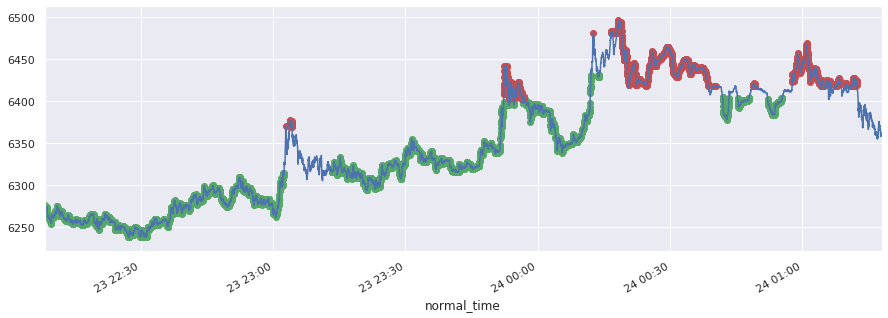

In [180]:
target1 = target[:10000]
res1 = res[:10000]

plt.figure(figsize=(15, 5))
target1.plot()
plt.scatter(target1[res1 == 1].index, target1[res1 == 1], color='g')
plt.scatter(target1[res1 == 0].index, target1[res1 == 0], color='r')

In [181]:
data2['state'] = res.reset_index(drop=True)

In [184]:
res.shape

(75290,)

In [185]:
target

normal_time
2020-03-23 22:08:16.376047    6275.845
2020-03-23 22:08:17.468746    6275.415
2020-03-23 22:08:18.614061    6275.365
2020-03-23 22:08:19.758219    6275.315
2020-03-23 22:08:20.904550    6275.325
                                ...   
2020-03-24 22:08:10.841265    6628.935
2020-03-24 22:08:11.975659    6628.925
2020-03-24 22:08:13.103745    6629.145
2020-03-24 22:08:14.224960    6629.155
2020-03-24 22:08:15.380395    6629.465
Name: target, Length: 75290, dtype: float64

In [186]:
data2.head()

,kline_trade_number,kline_open_price,kline_close_price,kline_high_price,kline_low_price,kline_base_volume,kline_quote_volume,kline_taker_base_volume,kline_taker_quote_volume,kline_time_since_update,...,depth_ask_quantity_13,depth_ask_quantity_14,depth_ask_quantity_15,depth_ask_quantity_16,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20,target,state
normal_time,,,,,,,,,,,,,,,,,,,,,
2020-03-23 22:08:16.376047,437,6279.51,6277.42,6289.51,6277.36,52.541583,330128.506774,28.33892,178050.025286,16375.457275,...,0.952000,0.0276,0.250000,0.200000,0.544834,0.074155,0.119432,0.300000,6275.845,NaN
2020-03-23 22:08:17.468746,437,6279.51,6277.42,6289.51,6277.36,52.541583,330128.506774,28.33892,178050.025286,17468.337158,...,0.952000,0.0276,0.500085,0.200000,0.544834,0.074155,0.500086,0.119432,6275.415,NaN
2020-03-23 22:08:18.614061,437,6279.51,6277.42,6289.51,6277.36,52.541583,330128.506774,28.33892,178050.025286,18613.458740,...,0.952000,0.0276,0.600000,0.544834,0.074155,0.015434,0.119432,0.300000,6275.365,NaN
2020-03-23 22:08:19.758219,437,6279.51,6277.42,6289.51,6277.36,52.541583,330128.506774,28.33892,178050.025286,19756.402344,...,0.500075,0.2500,0.500079,0.200000,0.600000,0.544834,0.074155,0.015434,6275.315,NaN
2020-03-23 22:08:20.904550,437,6279.51,6277.42,6289.51,6277.36,52.541583,330128.506774,28.33892,178050.025286,20903.012695,...,0.102935,0.0276,0.500012,0.200000,0.250000,0.500079,0.600000,0.544834,6275.325,NaN


In [189]:
data2.drop(['id', 'time', 'currency_pair'], axis=1, inplace=True)
data2.set_index('normal_time', drop=True, inplace=True)

In [190]:
data2['state'].replace({-1: np.NaN}, inplace=True)
data2.dropna(inplace=True)

In [191]:
data = data2.copy()

shifted_update = data['kline_time_since_update'].shift(1)
data['new_kline'] = data['kline_time_since_update'] < shifted_update

kline_id = 0

def get_id(x):
    global kline_id
    if x:
        kline_id += 1
    return x * kline_id

data['kline_id'] = data['new_kline'].apply(get_id)

data['kline_id'].replace({0: np.NaN}, inplace=True)
data['kline_id'].ffill(inplace=True)

data.dropna(inplace=True)

data.drop('new_kline', axis=1, inplace=True)
klines = data[['kline_id', 'kline_trade_number', 'kline_open_price', 'kline_close_price',
       'kline_high_price', 'kline_low_price', 'kline_base_volume',
       'kline_quote_volume', 'kline_taker_base_volume',
       'kline_taker_quote_volume', 'kline_time_since_update', 'kline_update_time']].groupby('kline_id').mean()

klines['kline_update_time'] = klines['kline_update_time'].apply(
    lambda x: datetime.datetime.fromtimestamp(x / 1000))

feat = ta.add_all_ta_features(klines, 'kline_open_price', 
                              'kline_high_price', 'kline_low_price', 'kline_close_price', 'kline_base_volume')

data.drop(['kline_trade_number', 'kline_open_price', 'kline_open_price',
       'kline_close_price', 'kline_high_price', 'kline_low_price',
       'kline_base_volume', 'kline_quote_volume', 'kline_taker_base_volume',
       'kline_taker_quote_volume', 'kline_time_since_update',
       'kline_update_time'], axis=1, inplace=True)

feat.drop('kline_update_time', axis=1, inplace=True)

IndexError: single positional indexer is out-of-bounds

In [137]:
data = data.merge(klines, on='kline_id')

In [138]:
data.fillna(0, inplace=True)

In [126]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [139]:
from sklearn.model_selection import train_test_split
X = data.drop('state', axis=1)
y = data['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1)


In [141]:
from sklearn.metrics import classification_report

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [142]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.59      0.31      0.40      9689
         1.0       0.51      0.78      0.62      9100

    accuracy                           0.53     18789
   macro avg       0.55      0.54      0.51     18789
weighted avg       0.55      0.53      0.51     18789



In [157]:
pd.Series(pred).value_counts()

1.0    13808
0.0     4981
dtype: int64

In [172]:
proba = model.predict_proba(X_test)
probas = pd.DataFrame(proba, columns=['minimum', 'maximum'], index=X_test.index)

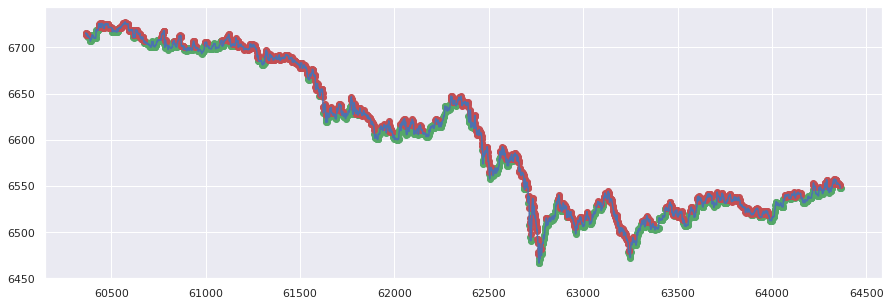

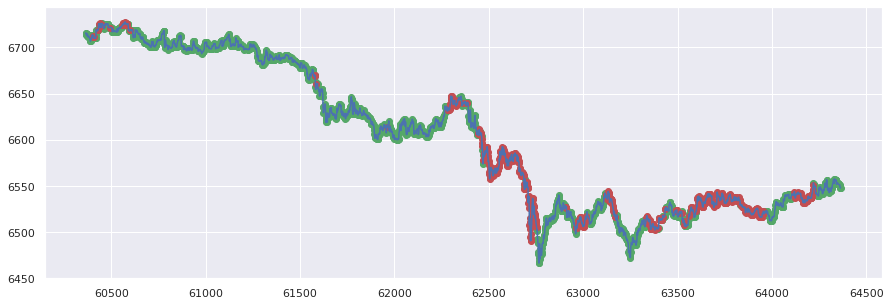

In [176]:
X_test1 = X_test[4000:8000]
probas1 = probas[4000:8000]

ups = probas1['maximum'] > 0.5
downs = probas1['minimum'] > 0.5

plt.figure(figsize=(15, 5))
plt.plot(X_test1.index, X_test1['target'])
plt.scatter(X_test1[y_test[4000:8000] == 1].index, X_test1[y_test[4000:8000] == 1]['target'], color='g')
plt.scatter(X_test1[y_test[4000:8000] == 0].index, X_test1[y_test[4000:8000] == 0]['target'], color='r')
plt.show()
plt.figure(figsize=(15, 5))
plt.plot(X_test1.index, X_test1['target'])
plt.scatter(X_test1[ups].index, X_test1[ups]['target'], color='g')
plt.scatter(X_test1[downs].index, X_test1[downs]['target'], color='r')

# Новое #

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

import sys
sys.path.append('..')
from stonks.DataCatcher import DB

In [5]:
dbase = DB()

Ну что ж, давайте думать, что с этим делать...

In [7]:
import datetime, time
t = datetime.datetime(2020, 3, 27, 21, 28)
start_time = time.mktime(t.timetuple())

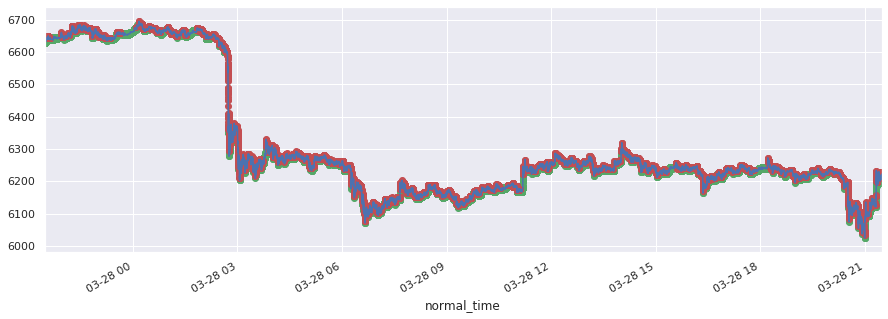

In [8]:
from stonks.auxiliary.data_preprocessing import get_kline_info, get_state, plot_state, plot_target
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
data = dbase.fetch_last(time.time() - start_time, pair='btcusdt')
plot_state(data, get_state(data, 0.001))

In [9]:
data['mid_price'] = (data['depth_bid_price_1'] + data['depth_ask_price_1']) / 2.

In [10]:
data.head()

,id,time,currency_pair,kline_trade_number,kline_open_price,kline_close_price,kline_high_price,kline_low_price,kline_base_volume,kline_quote_volume,...,depth_ask_quantity_13,depth_ask_quantity_14,depth_ask_quantity_15,depth_ask_quantity_16,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20,normal_time,mid_price
0,17987778,1.585334e+09,btcusdt,271,6634.11,6636.61,6640.00,6633.01,18.65698,123821.871042,...,0.007263,0.003000,0.250000,0.298640,0.100000,0.294000,0.799598,0.007263,2020-03-27 21:28:00.385732,6632.235
1,17987789,1.585334e+09,btcusdt,236,6635.91,6632.23,6636.73,6631.20,23.13095,153449.787991,...,0.003000,0.548642,0.250000,0.298640,0.294000,0.899599,0.100000,0.799598,2020-03-27 21:28:01.547754,6632.235
2,17987800,1.585334e+09,btcusdt,236,6635.91,6632.23,6636.73,6631.20,23.13095,153449.787991,...,0.548640,0.294000,0.003000,0.899599,0.100000,0.799598,0.007263,0.400097,2020-03-27 21:28:02.667219,6632.235
3,17987811,1.585334e+09,btcusdt,236,6635.91,6632.23,6636.73,6631.20,23.13095,153449.787991,...,0.548640,0.294000,0.003000,0.799608,0.799598,0.007263,0.500011,0.100000,2020-03-27 21:28:03.800433,6632.235
4,17987822,1.585334e+09,btcusdt,236,6635.91,6632.23,6636.73,6631.20,23.13095,153449.787991,...,0.294000,0.003000,0.799608,0.799598,0.007263,0.400012,0.400000,0.100000,2020-03-27 21:28:04.959580,6632.240


In [11]:
data.set_index('normal_time', inplace=True)
data.drop(['id', 'time', 'currency_pair'], axis=1, inplace=True)

In [12]:
kline_cols = []
for col in data.columns:
    if 'kline' in col:
        kline_cols.append(col)
klines = data[kline_cols]

In [13]:
not_kline = list(set(data.columns) - set(kline_cols))
# not_kline

In [14]:
orders = data[not_kline]

In [16]:
depth = 5

In [28]:
orders.columns[:4]

Index(['depth_bid_quantity_18', 'depth_ask_quantity_17',
       'depth_ask_quantity_4', 'depth_ask_price_4'],
      dtype='object')

In [29]:
# Distance to midpoint

for col in orders.columns:
    if ('quantity' in col) or (col == 'mid_price'):
        continue
    name = col.split('_')
    orders['mid_distance_' + name[1] + '_' + name[3]] = orders[col] / orders['mid_price'] - 1.

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [30]:
orders[['mid_distance_bid_1', 'mid_distance_ask_1', 'mid_distance_bid_20', 'mid_distance_ask_20']]

,mid_distance_bid_1,mid_distance_ask_1,mid_distance_bid_20,mid_distance_ask_20
normal_time,,,,
2020-03-26 21:48:01.132106,-7.526748e-07,7.526748e-07,-0.000553,0.000478
2020-03-26 21:48:02.300920,-6.925833e-05,6.925833e-05,-0.000498,0.000556
2020-03-26 21:48:03.440289,-5.871938e-05,5.871938e-05,-0.000459,0.000503
2020-03-26 21:48:04.596630,-7.678375e-05,7.678375e-05,-0.000467,0.000462
2020-03-26 21:48:05.716820,-7.151638e-05,7.151638e-05,-0.000439,0.000475
...,...,...,...,...
2020-03-27 21:48:31.333680,-2.183253e-05,2.183253e-05,-0.000382,0.000621
2020-03-27 21:48:32.451395,-2.183253e-05,2.183253e-05,-0.000382,0.000621
2020-03-27 21:48:33.570965,-4.517310e-05,4.517310e-05,-0.000407,0.000672


In [31]:
# Cumulative notional value

orders['cumulative_ask_1'] = orders['depth_ask_price_1'] * orders['depth_ask_quantity_1']
orders['cumulative_bid_1'] = orders['depth_bid_price_1'] * orders['depth_bid_quantity_1']

In [32]:
for i in range(2, depth + 1):
    orders['cumulative_ask_' + str(i)] = orders['depth_ask_price_' + str(i)] * \
            orders['depth_ask_quantity_' + str(i)] + orders['cumulative_ask_' + str(i - 1)]
    orders['cumulative_bid_' + str(i)] = orders['depth_bid_price_' + str(i)] * \
            orders['depth_bid_quantity_' + str(i)] + orders['cumulative_bid_' + str(i - 1)]

In [34]:
orders[['cumulative_ask_1', 'cumulative_bid_1', 'cumulative_ask_10', 'cumulative_bid_10']]

,cumulative_ask_1,cumulative_bid_1,cumulative_ask_10,cumulative_bid_10
normal_time,,,,
2020-03-26 21:48:01.132106,30335.194742,8947.356506,122584.881903,43479.533033
2020-03-26 21:48:02.300920,1054.505271,22430.196062,38734.109689,49074.189858
2020-03-26 21:48:03.440289,2434.812925,13035.641188,27106.003061,76277.119860
2020-03-26 21:48:04.596630,13285.080000,6641.533283,26700.715324,89474.569131
2020-03-26 21:48:05.716820,2434.851650,13409.496921,27056.266217,63901.991033
...,...,...,...,...
2020-03-27 21:48:31.333680,10860.566562,2408.507905,39511.542970,30458.934255
2020-03-27 21:48:32.451395,10860.566562,2408.507905,39511.542970,30458.934255
2020-03-27 21:48:33.570965,13282.840000,0.039845,28473.847558,22753.818339


In [35]:
# Notional imbalances

for i in range(1, depth + 1):
    orders['imbalance_' + str(i)] = (orders['cumulative_ask_' + str(i)] - orders['cumulative_bid_' + str(i)]) / \
            (orders['cumulative_ask_' + str(i)] + orders['cumulative_bid_' + str(i)])

In [36]:
# Spread

orders['spread'] = orders['depth_ask_price_1'] - orders['depth_bid_price_1']

In [126]:
X = orders
y = get_state(data)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [79]:
def fit(X, y):
    model = LogisticRegression(n_jobs=-1, solver='lbfgs')
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    
    proba = model.predict_proba(X_test)
    probas = pd.DataFrame(proba, columns=['maximum', 'minimum'], index=X_test.index)
    
    return model, X_train, X_test, y_train, y_test, probas

In [93]:
from sklearn.preprocessing import StandardScaler

In [141]:
X = pd.DataFrame(StandardScaler().fit_transform(X), index=X.index, columns=X.columns)

MemoryError: 

In [145]:
y = get_state(data)

In [ ]:
model, X_train, X_test, y_train, y_test, probas = fit(orders, y)

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [102]:
pred = model.predict(X_test)
pd.Series(pred).value_counts()

1    13345
0     1765
dtype: int64

In [86]:
pred

array([0, 0, 1, ..., 0, 0, 1])

In [87]:
probas

,maximum,minimum
normal_time,,
2020-03-27 12:41:27.985712,0.502177,0.497823
2020-03-27 12:41:29.127240,0.503575,0.496425
2020-03-27 12:41:30.275749,0.499991,0.500009
2020-03-27 12:41:31.415888,0.495719,0.504281
2020-03-27 12:41:32.569164,0.502694,0.497306
...,...,...
2020-03-27 17:33:18.353424,0.501469,0.498531
2020-03-27 17:33:19.503173,0.499586,0.500414
2020-03-27 17:33:20.617038,0.502218,0.497782


/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


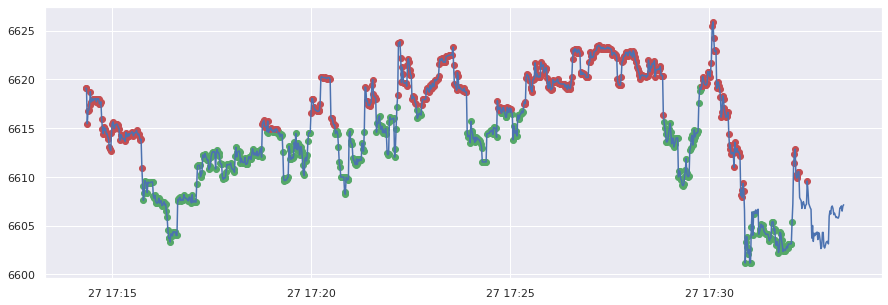

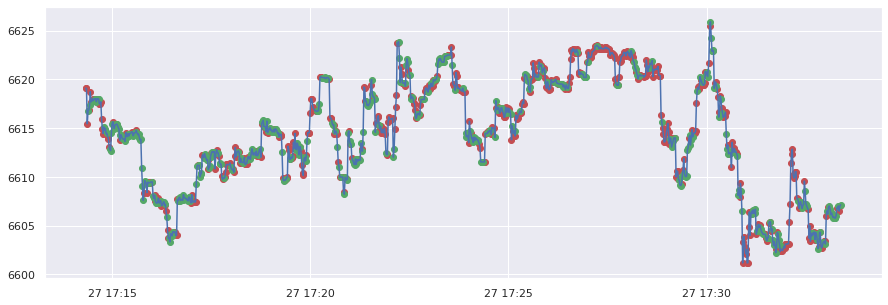

In [89]:
def plot(X_test, y_test, probas):
    X_test1 = X_test[-1000:]
    probas1 = probas[-1000:]
    y_test1 = y_test[-1000:]
    
    X_test1['target'] = (X_test1['depth_bid_price_1'] + X_test1['depth_ask_price_1']) / 2.

    ups = probas1['maximum'] > 0.5
    downs = probas1['minimum'] > 0.5

    plt.figure(figsize=(15, 5))
    plt.plot(X_test1.index, X_test1['target'])
    plt.scatter(X_test1[y_test1 == 1].index, X_test1[y_test1== 1]['target'], color='g')
    plt.scatter(X_test1[y_test1 == 0].index, X_test1[y_test1 == 0]['target'], color='r')
    plt.show()
    plt.figure(figsize=(15, 5))
    plt.plot(X_test1.index, X_test1['target'])
    plt.scatter(X_test1[ups].index, X_test1[ups]['target'], color='r')
    plt.scatter(X_test1[downs].index, X_test1[downs]['target'], color='g')

plot(X_test, y_test, probas)

In [115]:
co = list(zip(list(model.coef_[0]), list(X.columns)))

In [117]:
co.sort(reverse=True)
co[:30]

[(0.9042771394777194, 'spread'),
 (0.7855698719321904, 'cumulative_bid_1'),
 (0.5149397165282907, 'cumulative_ask_2'),
 (0.47449742855768673, 'cumulative_bid_11'),
 (0.44872111227033107, 'mid_distance_bid_1'),
 (0.4266188792648866, 'cumulative_bid_10'),
 (0.4171277513824682, 'cumulative_bid_2'),
 (0.41387995457890736, 'depth_bid_quantity_13'),
 (0.39232778918162153, 'cumulative_ask_3'),
 (0.29192007739047904, 'depth_ask_quantity_8'),
 (0.28641315983832527, 'depth_bid_quantity_15'),
 (0.28070510884872496, 'cumulative_ask_1'),
 (0.27870851145277337, 'cumulative_ask_6'),
 (0.2751658926874027, 'cumulative_bid_12'),
 (0.273552605071905, 'cumulative_ask_20'),
 (0.26564442148127004, 'cumulative_bid_13'),
 (0.2511870494995009, 'cumulative_bid_9'),
 (0.24789017343908312, 'depth_ask_quantity_4'),
 (0.23930287142797205, 'depth_ask_quantity_7'),
 (0.23306877852899022, 'depth_bid_quantity_11'),
 (0.22932278656876706, 'depth_ask_quantity_10'),
 (0.2278593146587574, 'depth_bid_quantity_12'),
 (0.2255

In [138]:
periods = ['3s', '5s', '10s', '30s', '1min', '5min']
cols = list(orders.columns)
for period in periods:
    for col in cols:
        orders[col + '_rolling_' + period] = orders[col].rolling(period).mean()

# Аааааа #

Окей, ограничим глубину ордербука.

In [17]:
def count_some(orders, depth):
    orders['mid_price'] = (orders['depth_bid_price_1'] + orders['depth_ask_price_1']) / 2.
    
    # Distance to midpoint
    for col in orders.columns:
        if ('quantity' in col) or (col == 'mid_price'):
            continue
        name = col.split('_')
        orders['mid_distance_' + name[1] + '_' + name[3]] = orders[col] / orders['mid_price'] - 1.
        
    # Cumulative notional value
    orders['cumulative_ask_1'] = orders['depth_ask_price_1'] * orders['depth_ask_quantity_1']
    orders['cumulative_bid_1'] = orders['depth_bid_price_1'] * orders['depth_bid_quantity_1']
    for i in range(2, depth + 1):
        orders['cumulative_ask_' + str(i)] = orders['depth_ask_price_' + str(i)] * \
                orders['depth_ask_quantity_' + str(i)] + orders['cumulative_ask_' + str(i - 1)]
        orders['cumulative_bid_' + str(i)] = orders['depth_bid_price_' + str(i)] * \
                orders['depth_bid_quantity_' + str(i)] + orders['cumulative_bid_' + str(i - 1)]
        
    # Notional imbalances
    for i in range(1, depth + 1):
        orders['imbalance_' + str(i)] = (orders['cumulative_ask_' + str(i)] - orders['cumulative_bid_' \
                + str(i)]) / (orders['cumulative_ask_' + str(i)] + orders['cumulative_bid_' + str(i)])
    
    # Spread
    orders['spread'] = orders['depth_ask_price_1'] - orders['depth_bid_price_1']
    return orders

In [18]:
to_leave = [['depth_ask_price_' + str(i), 'depth_ask_quantity_' + str(i), 'depth_bid_price_' + str(i),
             'depth_bid_quantity_' + str(i)] for i in range(1, 6)]

In [19]:
lea = []
for el in to_leave:
    lea += el
orders = orders[lea]

In [20]:
orders = count_some(orders, 5)

In [21]:
orders

,depth_ask_price_1,depth_ask_quantity_1,depth_bid_price_1,depth_bid_quantity_1,depth_ask_price_2,depth_ask_quantity_2,depth_bid_price_2,depth_bid_quantity_2,depth_ask_price_3,depth_ask_quantity_3,...,cumulative_ask_4,cumulative_bid_4,cumulative_ask_5,cumulative_bid_5,imbalance_1,imbalance_2,imbalance_3,imbalance_4,imbalance_5,spread
normal_time,,,,,,,,,,,,,,,,,,,,,
2020-03-27 21:28:00.385732,6632.24,0.363108,6632.23,0.415973,6632.27,0.019375,6631.62,0.000002,6632.28,0.363106,...,18209.640295,3992.909935,18242.802445,4012.903425,-0.067855,-0.041945,0.245957,0.640320,0.639382,0.01
2020-03-27 21:28:01.547754,6632.24,0.308144,6632.23,0.415973,6632.27,0.014375,6631.63,0.480677,6632.28,0.363106,...,6595.054038,6180.309115,6643.226975,7180.581949,-0.148910,-0.470900,-0.133343,0.032464,-0.038872,0.01
2020-03-27 21:28:02.667219,6632.24,0.308144,6632.23,0.415973,6632.27,0.014375,6631.63,0.480677,6632.28,0.363106,...,6595.054038,8526.876684,7385.997551,9853.150684,-0.148910,-0.470900,-0.133343,-0.127750,-0.143113,0.01
2020-03-27 21:28:03.800433,6632.24,0.308144,6632.23,0.415973,6632.27,0.014375,6631.63,0.480677,6632.28,0.363106,...,6595.054038,8526.876684,7385.997551,9853.150684,-0.148910,-0.470900,-0.133343,-0.127750,-0.143113,0.01
2020-03-27 21:28:04.959580,6632.25,0.363108,6632.23,0.415973,6632.28,0.363106,6631.64,0.480694,6632.56,0.308751,...,6912.426164,9134.303445,6937.261838,13120.927469,-0.067854,-0.105005,-0.141890,-0.138463,-0.308286,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-28 21:29:22.120858,6217.89,0.265048,6217.88,0.114503,6217.94,0.265000,6215.97,0.208261,6218.27,0.265015,...,6591.588333,15494.971782,8887.292341,16738.119782,0.396640,0.243155,0.053730,-0.403113,-0.306369,0.01
2020-03-28 21:29:23.234039,6219.02,0.350647,6219.01,2.284937,6219.21,0.265000,6217.86,0.049756,6219.56,0.172412,...,6599.333813,20699.429919,6623.653935,21905.151928,-0.733913,-0.582654,-0.575910,-0.516510,-0.535652,0.01
2020-03-28 21:29:24.376638,6221.93,0.003214,6219.64,0.212639,6221.94,0.192427,6219.62,0.403209,6222.08,0.391170,...,29784.985565,21074.074532,48452.095565,24130.618476,-0.970210,-0.517686,-0.466989,0.171276,0.335086,2.29


In [23]:
not_kline.remove('mid_price')

In [27]:
orders.drop(lea, axis=1, inplace=True)

In [31]:
orders

,mid_price,mid_distance_ask_1,mid_distance_bid_1,mid_distance_ask_2,mid_distance_bid_2,mid_distance_ask_3,mid_distance_bid_3,mid_distance_ask_4,mid_distance_bid_4,mid_distance_ask_5,...,cumulative_ask_4,cumulative_bid_4,cumulative_ask_5,cumulative_bid_5,imbalance_1,imbalance_2,imbalance_3,imbalance_4,imbalance_5,spread
normal_time,,,,,,,,,,,,,,,,,,,,,
2020-03-27 21:28:00.385732,6632.235,7.538937e-07,-7.538937e-07,0.000005,-0.000093,0.000007,-0.000132,0.000017,-0.000133,0.000029,...,18209.640295,3992.909935,18242.802445,4012.903425,-0.067855,-0.041945,0.245957,0.640320,0.639382,0.01
2020-03-27 21:28:01.547754,6632.235,7.538937e-07,-7.538937e-07,0.000005,-0.000091,0.000007,-0.000093,0.000049,-0.000132,0.000063,...,6595.054038,6180.309115,6643.226975,7180.581949,-0.148910,-0.470900,-0.133343,0.032464,-0.038872,0.01
2020-03-27 21:28:02.667219,6632.235,7.538937e-07,-7.538937e-07,0.000005,-0.000091,0.000007,-0.000093,0.000049,-0.000129,0.000063,...,6595.054038,8526.876684,7385.997551,9853.150684,-0.148910,-0.470900,-0.133343,-0.127750,-0.143113,0.01
2020-03-27 21:28:03.800433,6632.235,7.538937e-07,-7.538937e-07,0.000005,-0.000091,0.000007,-0.000093,0.000049,-0.000129,0.000063,...,6595.054038,8526.876684,7385.997551,9853.150684,-0.148910,-0.470900,-0.133343,-0.127750,-0.143113,0.01
2020-03-27 21:28:04.959580,6632.240,1.507786e-06,-1.507786e-06,0.000006,-0.000090,0.000048,-0.000092,0.000062,-0.000093,0.000184,...,6912.426164,9134.303445,6937.261838,13120.927469,-0.067854,-0.105005,-0.141890,-0.138463,-0.308286,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-28 21:29:22.120858,6217.885,8.041320e-07,-8.041320e-07,0.000009,-0.000308,0.000062,-0.000310,0.000073,-0.000314,0.000181,...,6591.588333,15494.971782,8887.292341,16738.119782,0.396640,0.243155,0.053730,-0.403113,-0.306369,0.01
2020-03-28 21:29:23.234039,6219.015,8.039858e-07,-8.039858e-07,0.000031,-0.000186,0.000088,-0.000210,0.000152,-0.000211,0.000155,...,6599.333813,20699.429919,6623.653935,21905.151928,-0.733913,-0.582654,-0.575910,-0.516510,-0.535652,0.01
2020-03-28 21:29:24.376638,6220.785,1.840604e-04,-1.840604e-04,0.000186,-0.000187,0.000208,-0.000350,0.000250,-0.000366,0.000255,...,29784.985565,21074.074532,48452.095565,24130.618476,-0.970210,-0.517686,-0.466989,0.171276,0.335086,2.29


In [33]:
orders['hour'] = orders.index.hour

In [34]:
orders

,mid_price,mid_distance_ask_1,mid_distance_bid_1,mid_distance_ask_2,mid_distance_bid_2,mid_distance_ask_3,mid_distance_bid_3,mid_distance_ask_4,mid_distance_bid_4,mid_distance_ask_5,...,cumulative_bid_4,cumulative_ask_5,cumulative_bid_5,imbalance_1,imbalance_2,imbalance_3,imbalance_4,imbalance_5,spread,hour
normal_time,,,,,,,,,,,,,,,,,,,,,
2020-03-27 21:28:00.385732,6632.235,7.538937e-07,-7.538937e-07,0.000005,-0.000093,0.000007,-0.000132,0.000017,-0.000133,0.000029,...,3992.909935,18242.802445,4012.903425,-0.067855,-0.041945,0.245957,0.640320,0.639382,0.01,21
2020-03-27 21:28:01.547754,6632.235,7.538937e-07,-7.538937e-07,0.000005,-0.000091,0.000007,-0.000093,0.000049,-0.000132,0.000063,...,6180.309115,6643.226975,7180.581949,-0.148910,-0.470900,-0.133343,0.032464,-0.038872,0.01,21
2020-03-27 21:28:02.667219,6632.235,7.538937e-07,-7.538937e-07,0.000005,-0.000091,0.000007,-0.000093,0.000049,-0.000129,0.000063,...,8526.876684,7385.997551,9853.150684,-0.148910,-0.470900,-0.133343,-0.127750,-0.143113,0.01,21
2020-03-27 21:28:03.800433,6632.235,7.538937e-07,-7.538937e-07,0.000005,-0.000091,0.000007,-0.000093,0.000049,-0.000129,0.000063,...,8526.876684,7385.997551,9853.150684,-0.148910,-0.470900,-0.133343,-0.127750,-0.143113,0.01,21
2020-03-27 21:28:04.959580,6632.240,1.507786e-06,-1.507786e-06,0.000006,-0.000090,0.000048,-0.000092,0.000062,-0.000093,0.000184,...,9134.303445,6937.261838,13120.927469,-0.067854,-0.105005,-0.141890,-0.138463,-0.308286,0.02,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-28 21:29:22.120858,6217.885,8.041320e-07,-8.041320e-07,0.000009,-0.000308,0.000062,-0.000310,0.000073,-0.000314,0.000181,...,15494.971782,8887.292341,16738.119782,0.396640,0.243155,0.053730,-0.403113,-0.306369,0.01,21
2020-03-28 21:29:23.234039,6219.015,8.039858e-07,-8.039858e-07,0.000031,-0.000186,0.000088,-0.000210,0.000152,-0.000211,0.000155,...,20699.429919,6623.653935,21905.151928,-0.733913,-0.582654,-0.575910,-0.516510,-0.535652,0.01,21
2020-03-28 21:29:24.376638,6220.785,1.840604e-04,-1.840604e-04,0.000186,-0.000187,0.000208,-0.000350,0.000250,-0.000366,0.000255,...,21074.074532,48452.095565,24130.618476,-0.970210,-0.517686,-0.466989,0.171276,0.335086,2.29,21


In [42]:
orders.columns

Index(['mid_price', 'mid_distance_ask_1', 'mid_distance_bid_1',
       'mid_distance_ask_2', 'mid_distance_bid_2', 'mid_distance_ask_3',
       'mid_distance_bid_3', 'mid_distance_ask_4', 'mid_distance_bid_4',
       'mid_distance_ask_5', 'mid_distance_bid_5', 'cumulative_ask_1',
       'cumulative_bid_1', 'cumulative_ask_2', 'cumulative_bid_2',
       'cumulative_ask_3', 'cumulative_bid_3', 'cumulative_ask_4',
       'cumulative_bid_4', 'cumulative_ask_5', 'cumulative_bid_5',
       'imbalance_1', 'imbalance_2', 'imbalance_3', 'imbalance_4',
       'imbalance_5', 'spread', 'hour', 'mid_price_rolling_5s',
       'mid_price_rolling_15s', 'mid_price_rolling_30s',
       'mid_price_rolling_1min', 'mid_price_rolling_5min'],
      dtype='object')

In [43]:
periods = ['5s', '15s', '30s', '1min', '5min']
rolling_cols = ['mid_price', 'spread', 'cumulative_ask_5', 'cumulative_bid_5', 'imbalance_1']
for period in periods:
    for col in rolling_cols:
        orders[col + '_rolling_' + period] = orders[col] - orders[col].rolling(period).mean()

In [46]:
klines = get_kline_info(klines)

../stonks/auxiliary/data_preprocessing.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_kline'] = data['kline_time_since_update'] < shifted_update
../stonks/auxiliary/data_preprocessing.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kline_id'] = data['new_kline'].apply(get_id)
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [48]:
full = pd.concat()

Index(['kline_id', 'kline_trade_number', 'kline_open_price',
       'kline_close_price', 'kline_high_price', 'kline_low_price',
       'kline_base_volume', 'kline_quote_volume', 'kline_taker_base_volume',
       'kline_taker_quote_volume', 'kline_time_since_update', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'momentum_mfi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volatility_atr',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dchi',
       'volatility_dcli', 'trend_macd', 'trend_macd_signal', 'trend_macd_diff',
       'trend_ema_fast', 'trend_ema_slow', 'trend_adx', 'trend_adx_pos',
       'trend_adx_neg', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
 

In [60]:
klines = data[kline_cols]

In [62]:
orders.shape

(75752, 53)

In [61]:
klines.shape

(75752, 11)

In [68]:
from importlib import reload
import stonks.auxiliary
stonks = reload(stonks)

In [69]:
from stonks.auxiliary.data_preprocessing import get_kline_info

In [71]:
klines_proc.shape

(75751, 81)

In [73]:
klines = data[kline_cols]

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [138]:
def fit(X, y):
    model = XGBClassifier(n_jobs=-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    
    proba = model.predict_proba(X_test)
    probas = pd.DataFrame(proba, columns=['maximum', 'minimum'], index=X_test.index)
    
    return model, X_train, X_test, y_train, y_test, probas

In [77]:
y = get_state(data)

In [122]:
orders['normal_time'] = orders.index
full = pd.concat([orders, data[kline_cols]], axis=1)

In [123]:
full.index = orders.index
kl = get_kline_info(full)

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ta/trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ta/trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [118]:
reload(stonks)

<module 'stonks' from '../stonks/__init__.py'>

In [119]:
from stonks.auxiliary.data_preprocessing import get_state

In [111]:
kl.columns

Index(['mid_price', 'mid_distance_ask_1', 'mid_distance_bid_1',
       'mid_distance_ask_2', 'mid_distance_bid_2', 'mid_distance_ask_3',
       'mid_distance_bid_3', 'mid_distance_ask_4', 'mid_distance_bid_4',
       'mid_distance_ask_5',
       ...
       'momentum_uo', 'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
       'momentum_ao', 'momentum_kama', 'momentum_roc', 'others_dr',
       'others_dlr', 'others_cr'],
      dtype='object', length=134)

In [137]:
from xgboost import XGBClassifier

In [121]:
y = get_state(data)

In [126]:
y = y[kl['normal_time']]

In [128]:
kl.drop('normal_time', axis=1, inplace=True)
X = kl[:]

In [134]:
y = y.reset_index(drop=True)

In [135]:
ind = y != -1
X = X[ind]
y = y[ind]

In [139]:
model, X_train, X_test, y_train, y_test, probas = fit(X, y)

              precision    recall  f1-score   support

           0       0.56      0.26      0.36      7830
           1       0.50      0.78      0.61      7318

    accuracy                           0.51     15148
   macro avg       0.53      0.52      0.48     15148
weighted avg       0.53      0.51      0.48     15148

